In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer as Vectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
basepath = '/Users/rsciagli/Documents/Spring_2021/ML_CSCI_659/waseem/'

In [4]:
train_raw = basepath + 'cleantrain.txt'
test_raw = basepath + 'cleantest.txt'
train_gold_raw = basepath + 'waseemtrainGold.txt'
test_gold_raw = basepath + 'waseemtestGold.txt'

In [5]:
with open(train_raw) as f:
    train = f.readlines()

In [6]:
with open(test_raw) as f:
    test = f.readlines()

In [7]:
with open(train_gold_raw) as f:
    train_gold = f.readlines()
    train_gold = [int(s.strip()) for s in train_gold]

(array([4460.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9683.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

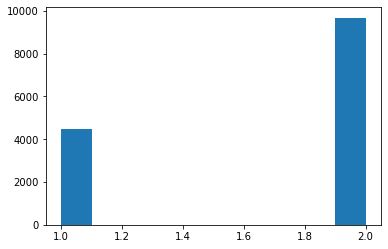

In [9]:
## just looking at the distribution of the two classes.
plt.hist(train_gold)

In [10]:
with open(test_gold_raw) as f:
    test_gold = f.readlines()
    test_gold = [int(s.strip()) for s in test_gold]

(array([ 496.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1076.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

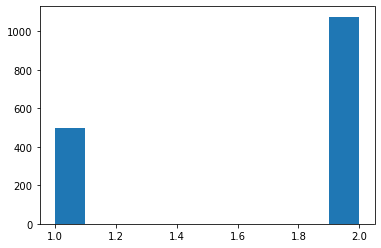

In [11]:
## just looking at the distribution of the two classes.
plt.hist(test_gold)

In [12]:
scaler = Vectorizer(analyzer='char', ngram_range=(1,3), strip_accents='ascii')
scaler.fit(train)
train_vecs = scaler.transform(train)
test_vecs = scaler.transform(test)

In [22]:
train_vecs

<14143x23289 sparse matrix of type '<class 'numpy.float64'>'
	with 2540681 stored elements in Compressed Sparse Row format>

In [14]:
test_vecs

<1572x23289 sparse matrix of type '<class 'numpy.float64'>'
	with 282866 stored elements in Compressed Sparse Row format>

In [15]:
## checking to see if .todense() works on the vectors.  Thought maybe we would need to .todense() the vectors
## bc of so many columns, but this was not needed.
train_vecs.todense()

matrix([[0.02934985, 0.22905266, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.028386  , 0.22153054, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02057281, 0.23191238, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.18058751, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.09902707, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.08928238, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [21]:
for C in [1e-3, 1e-2, 1e-1, 1e0, 1e1]:
    model_lr = LogisticRegression(C=C, solver='saga', penalty='l1')
    model_lr.fit(train_vecs, train_gold)
    pred = model_lr.predict(test_vecs)
    print(C)
    print(classification_report(test_gold, pred))

0.001
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.68      1.00      0.81      1076

    accuracy                           0.68      1572
   macro avg       0.34      0.50      0.41      1572
weighted avg       0.47      0.68      0.56      1572

0.01
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.68      1.00      0.81      1076

    accuracy                           0.68      1572
   macro avg       0.34      0.50      0.41      1572
weighted avg       0.47      0.68      0.56      1572

0.1
              precision    recall  f1-score   support

           1       0.78      0.39      0.52       496
           2       0.77      0.95      0.85      1076

    accuracy                           0.77      1572
   macro avg       0.78      0.67      0.68      1572
weighted avg       0.77      0.77      0.75      1572

1.0


In [17]:
## looking at the coefficients
model_lr.coef_

array([[ 2.61931285, -3.26826175, -2.89205034, ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
tokens = np.array(scaler.get_feature_names())

In [19]:
## top 10 offensive 3-grams
tokens[np.argsort(model_lr.coef_)[0,:10]].tolist()

['sex', 'fem', 'kat', '@sy', 'cun', '.@', 'itc', '#cu', 'l..', 'hus']

In [20]:
## top 10 most predictive 3-grams
list(reversed(tokens[np.argsort(np.abs(model_lr.coef_))[0,-10:]]))

['sex', 'fem', 'kat', '@sy', 'mee', 'cun', '.@', 'itc', '#cu', 'l..']